# ECE 420 Final Project: Tip of the Toungue

## Creating Eigenfaces from training set

Rutvik Sayankar,
Charlie Plonski,
Aahan Thapliyal

In [3]:
# Import the necessary libraries
import numpy as np
import os
from PIL import Image, ImageOps

root_dir = os.getcwd()

src = os.path.join(root_dir,'./YALE/centered/')
allFileNames = os.listdir(src)
# os.abort()

# srccropped = os.path.join(root_dir,'./YALE/supported/')
# cropppedFileNames = os.listdir(src)

# load the image and convert into
# numpy array

numclasses = 15
picsperclass = 11
# picsperclass = 22
# print((cropppedFileNames))
numEigenfaces = 146 #previoulsy used 136
skippedeigenfaces = 0
# newsize = (195, 231) # AVERAGE SIZE OF CHAZCROPPED IMAGES IS 106x128 #195x231 is centered size
newsize = (106,128)
# newsize = (50,52)
# print(newsize)
origdata = np.zeros((newsize[0]*newsize[1],numclasses * picsperclass))
i = 0

# print(len(allFileNames))
for name in allFileNames:

    img = Image.open(src + name)
    img = img.convert("L")
    # print(img.size)
    img = img.resize(newsize)
    img = ImageOps.equalize(img)
    if(i  == 0):
        img.show()
    numpydata = np.asarray(img)
    origdata[:,i] = numpydata.flatten()
    i+=1

    # img = Image.open(srccropped + cropppedFileNames[i//2])
    # img = img.convert("L")
    # img = img.resize(newsize)
    # if(i  == 5):
    #     img.show()
    # numpydata = np.asarray(img)
    # origdata[:,i] = numpydata.flatten()
    # i+=1

# Transposed Data
origdata = origdata.T
data = np.copy(origdata)
print("Data Shape: ", data.shape)
#image size is 218*178

#zero mean the data
mean = np.mean(data,axis = 0).reshape(-1,1)

# Reshape the data
data = data - mean.reshape(1,-1)

print("Mean Reshaped: ", mean.shape)

Data Shape:  (165, 13568)
Mean Reshaped:  (13568, 1)


In [4]:
# print(tempsize/165)

In [5]:
def pca(data):
        """ Implement PCA via the eigendecomposition or the SVD.

        Parameters:
        1. data     (N,d) numpy ndarray. Each row as a feature vector.

        Outputs:
        1. W        (d,d) numpy array. PCA transformation matrix (Note that each **row** of the matrix should be a principal component)
        2. s        (d,) numpy array. Vector consisting of the amount  of variance explained in the data by each PCA feature.
        Note that the PCA features are ordered in **decreasing** amount of variance explained, by convention.
        """
        W = np.zeros((data.shape[1],data.shape[1]))
        s = np.zeros(data.shape[1])
        # Put your code below
        covariance_matrix = np.dot(data,data.T)/(data.shape[0])
        eigvals, eigvecs = np.linalg.eigh(covariance_matrix)
        eigvals = eigvals[::-1]
        eigvecs = eigvecs[:,::-1]
        W = eigvecs
        s = eigvals
        

        return (W,s)

In [6]:

from sklearn.decomposition import PCA
libpca = PCA().fit(data)
libeigfaces = libpca.components_

eigenfaces = pca(data)

In [7]:
W = eigenfaces[0] # Eigenvectors
s = eigenfaces[1] # Eigenvalues
print(W.shape)
print(data.shape)
# eigenfaces = W.dot(data)
eigenfaces = data.T.dot(W)

eigenfaces=eigenfaces.T

print("Eigenfaces Shape: ", eigenfaces.shape)

# Normalizes the eigenfaces between 0 & 1
for i in range(eigenfaces.shape[0]):
    eigenfaces[i] = eigenfaces[i]/np.linalg.norm(eigenfaces[i])


#LIBRARY
eigenfaces = libeigfaces
print(eigenfaces.shape)

(165, 165)
(165, 13568)
Eigenfaces Shape:  (165, 13568)
(165, 13568)


In [8]:
# print(libpca.singular_values_)
# print(s)

In [9]:
# magicmatrix = eigenfaces[0:numEigenfaces]
magicmatrix = eigenfaces[skippedeigenfaces:numEigenfaces]
print(magicmatrix.shape)

(146, 13568)


In [10]:
# import csv

# # Define the data to be stored in the CSV file
# # Open a new CSV file in write mode
# with open("MeanAndFaces.csv", "w", newline="") as csvfile:
#     # Create a CSV writer object
#     writer = csv.writer(csvfile)
    
#     # Write the data to the CSV file
#     writer.writerow(mean.flatten())
#     for i in range(numEigenfaces):
#         writer.writerow(magicmatrix[i])
# #     writer.writerow(aahandata)
# #     writer.writerow(chazdata)
# #     writer.writerow(rudydata)

In [11]:
#begin extension to fisher faces

#NOTES: numclasses =15, numpicsperclass = 11, num total pics = 165
print(origdata.shape)
classData = np.zeros((15,picsperclass,newsize[0]*newsize[1]))
for i in range(165):
    classData[i//picsperclass][i%picsperclass] = origdata[i]



(165, 13568)


In [12]:
# correct data
# toshow = Image.fromarray(classData[0][5].reshape((newsize[1],newsize[0])))
# toshow.show()

In [13]:
#calculating optimization
Sbprojected = np.zeros((numEigenfaces- skippedeigenfaces,numEigenfaces-skippedeigenfaces))
Swprojected = np.zeros((numEigenfaces-skippedeigenfaces,numEigenfaces-skippedeigenfaces))


#calculating SBprojected
mean  = mean.flatten()
#mean is mean for all images calculated above
for i in range(numclasses):
    temp = classData[i]
    classmean = np.mean(temp, axis = 0)
    left  = magicmatrix @(classmean - mean.flatten()).reshape(-1,1)
    right = (classmean - mean).reshape(1,-1) @ magicmatrix.T
    Sbprojected += picsperclass * left @ right

In [14]:
# Sw = np.zeros((newsize[0]*newsize[1],newsize[0]*newsize[1]))
#calculating Sw projected
for i in range(numclasses):
    for j in range(picsperclass):
        classmean = np.mean(classData[i], axis = 0)
        left = magicmatrix @ (classData[i][j] - classmean).reshape(-1,1)
        right = (classData[i][j] - classmean).reshape(1,-1) @ magicmatrix.T
        Swprojected += left @ right


In [15]:
# Swprojected = magicmatrix @ Sw @ magicmatrix.T
# Sbprojected = magicmatrix @ Sb @ magicmatrix.T

# Swprojected = np.genfromtxt('./Sbprojectedto136(160x121).csv', delimiter=',')
# Sbprojected = np.genfromtxt('./Swprojectedto136(160x121).csv', delimiter=',')

In [16]:
# np.savetxt('Sbprojectedto136(160x121).csv',Sbprojected, delimiter=",")
# np.savetxt('Swprojectedto136(160x121).csv',Swprojected, delimiter=",")

In [17]:
# w1,v1 = np.linalg.eigh(Sbprojected)
# w2,v2 = np.linalg.eigh(Swprojected)
# w1 =w1[::-1]
# v1 = v1[:,::-1]
# w2 = w2[::-1]
# v2 = v2[:,::-1]

In [18]:
from scipy.linalg import eigh

# geneigvals, geneigvecs = eigh(Sbprojected, Swprojected + np.identity(Swprojected.shape[0])*.000001, eigvals_only=False)
geneigvals, geneigvecs = eigh(Sbprojected, Swprojected, eigvals_only=False)

geneigvals = geneigvals[::-1]
geneigvecs =  geneigvecs[:,::-1]
# geneigvecs =  v1[:,::-1]

geneigvecs = geneigvecs.T
# print(np.linalg.norm(geneigvecs[:,0]))
# temp0 = geneigvecs[:,0]/np.linalg.norm(geneigvecs[:,0])
# for i in range(geneigvecs.shape[0]):
#     geneigvecs[i] = geneigvecs[i]/np.linalg.norm(geneigvecs[i])

14


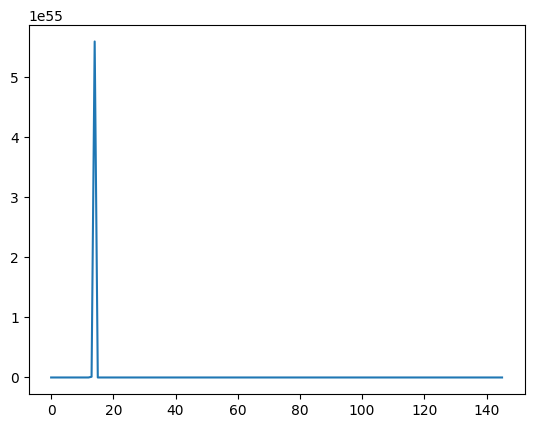

In [19]:
import matplotlib.pyplot as plt
import scipy
temp = np.zeros(numEigenfaces)

for i in range(1,numEigenfaces):
    potentialFish = geneigvecs[:i]
    upperterm = potentialFish @ Sbprojected @ potentialFish.T
    lowterm = potentialFish @ Swprojected @ potentialFish.T

    # lowterm = lowterm/np.amax(lowterm)
    # upperterm = upperterm /np.amax(upperterm)

    upperdet = scipy.linalg.det(upperterm)
    lowdet = scipy.linalg.det(lowterm)
    # print(lowdet)
    temp[i] = upperdet


print(np.argmax(temp))
plt.plot(np.arange(numEigenfaces), temp)
fishMat = geneigvecs[:np.argmax(temp)]


# transformmat = np.delete(fishMat, [3, 6], 0)
# transformmat = np.delete(transformmat, -2, 0)
# transformmat = np.delete(transformmat, -4, 0)
# fishMat = transformmat




In [20]:
#THANK GOD
# print(magicmatrix.shape)
FinalMat = fishMat @ magicmatrix
# print(FinalMat.shape)

In [21]:
for i in range(FinalMat.shape[0]):
    FinalMat[i] = FinalMat[i]/np.linalg.norm(FinalMat[i])

print(FinalMat.shape)

(14, 13568)


In [22]:
import csv

# Define the data to be stored in the CSV file
# Open a new CSV file in write mode
with open("MeanAndFaces.csv", "w", newline="") as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)
    
    # Write the data to the CSV file
    writer.writerow(mean.flatten())
    for i in range(FinalMat.shape[0]):
        writer.writerow(FinalMat[i])


In [23]:
# generates eigenfaces csv file


import csv

# Define the data to be stored in the CSV file
# Open a new CSV file in write mode
print(magicmatrix.shape[0])
with open("EigenFaces.csv", "w", newline="") as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)
    
    # Write the data to the CSV file
    writer.writerow(mean.flatten())
    for i in range(magicmatrix.shape[0]):
        writer.writerow(magicmatrix[i])

146


In [ ]:
# import os

# folder_path = "./YALE/supported/"  # replace with the path to your folder

# # Loop through all files in the folder
# for filename in os.listdir(folder_path):
#     if not filename.endswith(".png"):  # if the file doesn't end with ".png"
#         file_path = os.path.join(folder_path, filename)  # get the full file path
#         os.remove(file_path)  # delete the file
